# Motion Correction Comparison

In this notebook, we will compare a motion corrected brain produced by CPAC, and a motion corrected brain produced by FNGS. In theory after motion correction, all slices in the brain should ideally be aligned spatially in relation to one another. That is, if motion correction is successful, the brain regions should overlap maximally.

## Quantification

To quantify overlap, we consider the Jaccard Index:

\begin{equation}
    J(A, B) = \frac{|A \cap B|}{|A \cup B|}
\end{equation}

We will consider the Jaccard Index of all permutations of arbitrarily selected volumes: the 0th, 20th, 50th, 80th, 110th, 140th, 170th, and 200th volumes (total of $6 \cdot 8 = 48$ overlaps). 

## Notes about procedure

Note that for our Jaccard Index to be meaningful, we must first skullstrip our inputs. We will use FSL's BET with a 0.3 tolerance, with the robust option selected to ensure that we get a good quality Brain extraction. To validate that our brain extraction quality is not impacting our results, we will show qualitative plots to confirm that our BET worked.

# Brain Extraction

Here, we extract the brain from the afformentioned slices, and plot one example of the particular slice with its respective extracted brain to demonstrate success:

In [109]:
%matplotlib nbagg
import ndmg
import ndmg.utils as mgu
from ndmg.stats.qa_reg import plot_overlays
from ndmg.stats.func_qa_utils import percent_overlap
import nibabel as nb
import matplotlib
import numpy as np

matplotlib = reload(matplotlib)
matplotlib.use('GTK', force=True)

fngs_mc_base = '/home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc'
fngs_mc = '{}.nii.gz'.format(fngs_mc_base)
mc_im = nb.load(fngs_mc)
mc_dat = mc_im.get_data()
slices = [0, 19, 49, 79, 109, 139, 169, 199]
fngs_sl_mc = []
fngs_sl_mc_brain = []
for (i, sl) in enumerate(slices):
    new_mc = "{}_{}.nii.gz".format(fngs_mc_base, i)
    new_mc_brain = "{}_{}_brain.nii.gz".format(fngs_mc_base, i)
    new_dat = mc_dat[:,:,:,sl]
    fngs_sl_mc.append(new_mc)
    nb.save(img=nb.Nifti1Image(dataobj=new_dat, header=mc_im.header, affine=mc_im.affine),
            filename=new_mc)
    mgu.extract_brain(new_mc, new_mc_brain, opts='-f 0.3 -R')
    fngs_sl_mc_brain.append(new_mc_brain)

Executing: bet /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_0.nii.gz /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_0_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_1.nii.gz /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_1_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_2.nii.gz /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_2_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_3.nii.gz /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_3_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_4.nii.gz /home/eric/cmp/fngs/outputs/reg/func/preproc/sub-0025864_ses-1_bold_preproc_4_brain.nii.gz -f 0.

['/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_0_brain.nii.gz', '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_1_brain.nii.gz', '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_2_brain.nii.gz', '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_3_brain.nii.gz', '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_4_brain.nii.gz', '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_5_brain.nii.gz', '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_6_brain.nii.gz', '/home/eric/cmp/fngs/outputs/tmp/sub-0025864_ses-1_bold_preproc_self-aligned_7_brain.nii.gz']


<IPython.core.display.Javascript object>


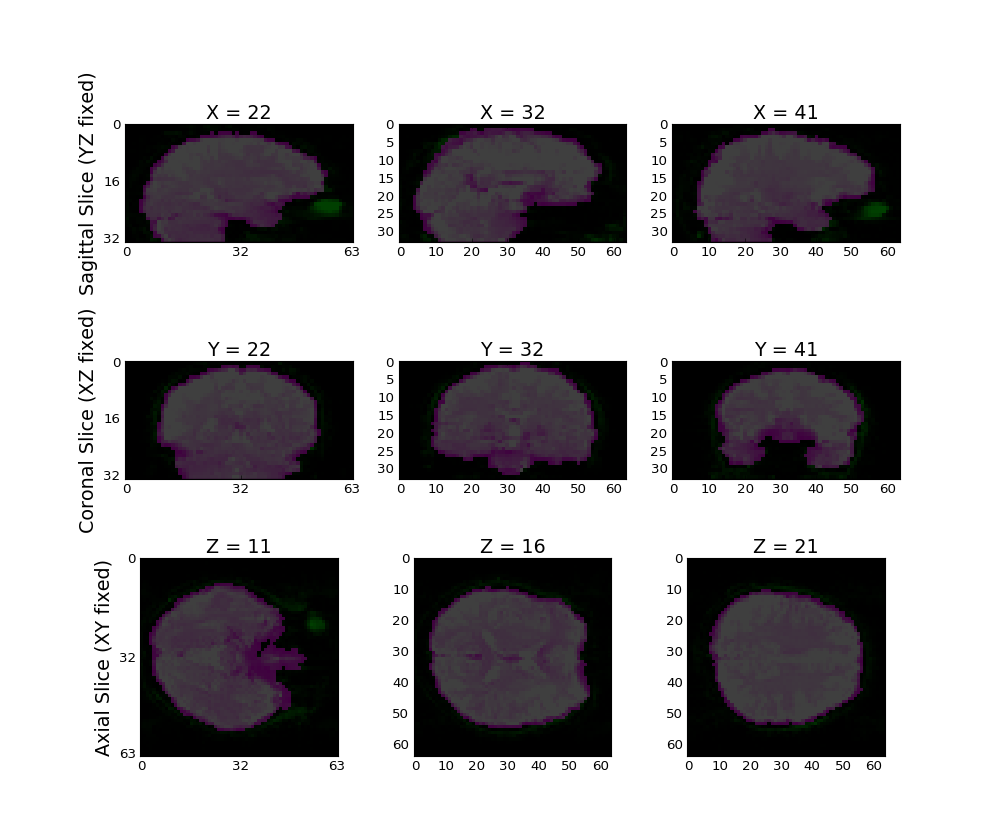

In [108]:
matplotlib.use('GTK', force=True)
fig = plot_overlays((nb.load(fngs_sl_reg_brain[0]).get_data() != 0).astype(float), nb.load(fngs_sl_reg[0]).get_data())
fig.show()

In [78]:
cpac_mc_base = '/home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/motion_correct/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg'
cpac_mc = '{}.nii.gz'.format(cpac_mc_base)
mc_im = nb.load(cpac_mc)
mc_dat = mc_im.get_data()
slices = [0, 19, 49, 79, 109, 139, 169, 199]
cpac_sl_mc = []
cpac_sl_mc_brain = []
for (i, sl) in enumerate(slices):
    new_mc = "{}_{}.nii.gz".format(cpac_mc_base, i)
    new_mc_brain = "{}_{}_brain.nii.gz".format(cpac_mc_base, i)
    new_dat = mc_dat[:,:,:,sl]
    cpac_sl_mc.append(new_mc)
    nb.save(img=nb.Nifti1Image(dataobj=new_dat, header=mc_im.header, affine=mc_im.affine),
            filename=new_mc)
    mgu.extract_brain(new_mc, new_mc_brain, opts='-f 0.3 -R')
    cpac_sl_mc_brain.append(new_mc_brain)

Executing: bet /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/motion_correct/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg_0.nii.gz /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/motion_correct/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg.nii.gz_0_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/motion_correct/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg_1.nii.gz /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/motion_correct/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg.nii.gz_1_brain.nii.gz -f 0.3 -R
Executing: bet /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/motion_correct/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg_2.nii.gz /home/eric/cmp/cpac/pipeline_HCPtest/sub-0025864_ses-1/motion_correct/_scan_rest_1_rest/sub-0025864_ses-1_bold_calc_tshift_resample_volreg.nii.gz_2_brain.nii.gz -f 0.3 -

<IPython.core.display.Javascript object>


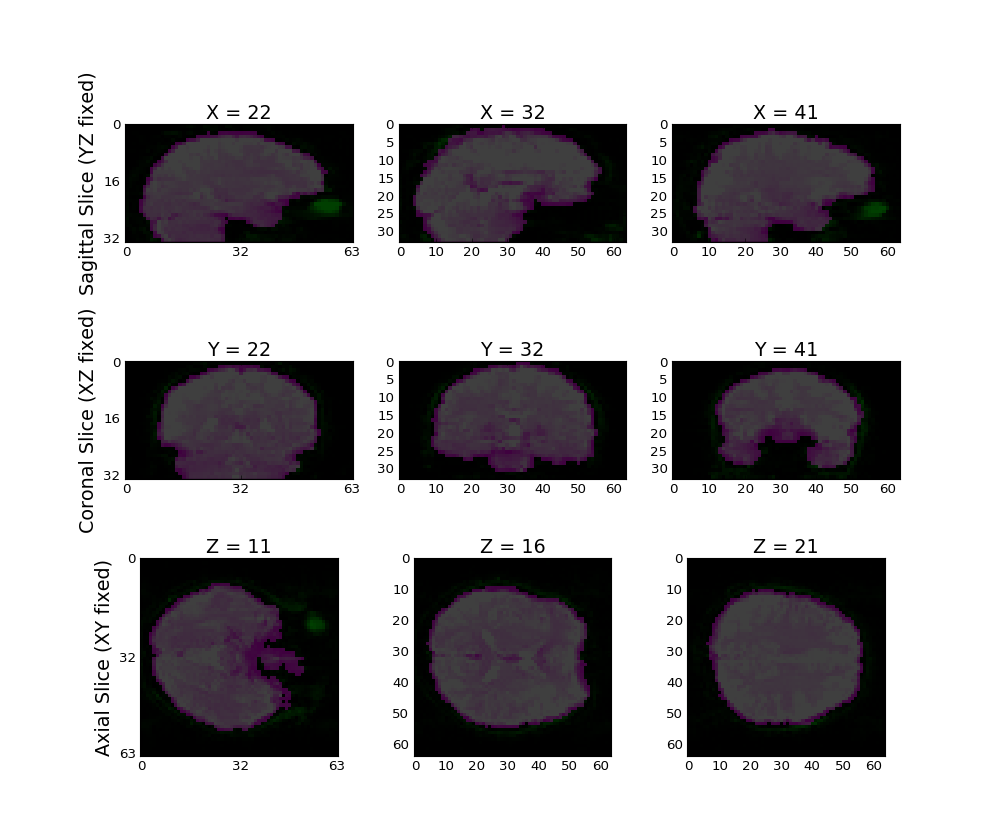

In [79]:
matplotlib.use('GTK', force=True)
fig = plot_overlays((nb.load(cpac_sl_mc_brain[0]).get_data() != 0).astype(float), nb.load(cpac_sl_mc[0]).get_data())
fig.show()

# Visualization

Next, we will visualize the Jaccard Index of all possible permutations of the masks from the afformentioned slices with respect to each tool's motion corrected output:

In [112]:
fngs_jac = []
cpac_jac = []
for i, slout in enumerate(fngs_sl_mc_brain):
    for j, slin in enumerate(fngs_sl_mc_brain):
        if i != j:
            fngs_jac.append(percent_overlap(nb.load(slout).get_data(), nb.load(slin).get_data()))

IndentationError: expected an indented block (<ipython-input-112-be9c979b6085>, line 6)

In [110]:
cpac_jac = []
for i, slout in enumerate(cpac_sl_mc_brain):
    for j, slin in enumerate(cpac_sl_mc_brain):
        if i != j:
            cpac_jac.append(percent_overlap(nb.load(slout).get_data(), nb.load(slin).get_data()))

<IPython.core.display.Javascript object>


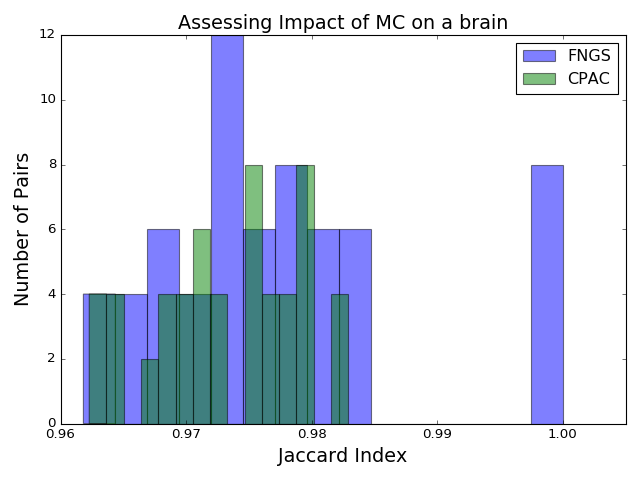

In [111]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(fngs_jac, bins=15, alpha=0.5, label='FNGS')
ax.hist(cpac_jac, bins=15, alpha=0.5, label='CPAC')
ax.set_xlabel('Jaccard Index')
ax.set_ylabel('Number of Pairs')
ax.set_title('Assessing Impact of MC on a brain')
ax.legend()
fig.tight_layout()
fig.show()

In [105]:
print("FNGS mean: {}".format(np.mean(fngs_jac)))
print("CPAC mean: {}".format(np.mean(cpac_jac)))

FNGS mean: 0.977349725016
CPAC mean: 0.976652913138
